# Electron transport through a 1D chain


In this tutorial, we are going to introduce the tight binding approximation by considering a 1D chain. In the tight binding approximation, we assume that the wave function can be written as a linear combination of atomic orbitals (LCAO),
$$\psi(x) = \sum_{i=1}^{N} c_i \phi_i(x).$$
For electron transport, there are 3 regions we are concerned with. On the left hand side, we have the left lead. Here, we have a periodic potential and the lead extends to $-\infty$. The equation we must solve for the leads looks like
$$
-\frac{\hbar^2}{2m} \partial_x^2 \psi + V(x) = E \psi
$$
where $V$ is the periodic potential. After the discretization step, we end up with 
\begin{eqnarray}
-\frac{\hbar^2}{2m\Delta^2}(\psi_{n-1} - 2 \psi_n + \psi_{n+1}) + V_n \psi_n &=& E \psi_n\\
-tc_{n-1}\phi_{n-1} + (V_n + 2t) c_n\phi_n -t c_{n+1} \phi_{n+1} &=& E c_n \phi_n
\end{eqnarray}
If we now multiply the left hand side by $\phi_m^*$ and integrate over all space we end up with
\begin{eqnarray}
-tc_{n-1}\delta_{m, n-1} + (V_n + 2t) c_n\delta_{m,n} -t c_{n+1} \delta_{m, n+1} &=& E c_n \delta_{m,n}
\end{eqnarray}
since $\langle \phi_m | \phi_n \rangle = \delta_{m,n}$. We therefore now have the eigenvalue problem
\begin{equation}
\begin{pmatrix}
\ddots & \ddots         & \ddots       & 0         & 0      & 0       & 0 \\
0 & \beta_{n-1}^* & h_n          & \beta_n        & 0       & 0      & 0 \\
0 & 0        & \beta_{n}^* & h_{n+1}         & \beta_{n+1} & 0      & 0 \\
0 & 0        & 0       & \beta_{n+1}^*  & h_{n+2}      & \beta_{n+2} & 0\\
0 & 0         & 0       & 0          & \ddots       & \ddots       & \ddots 
\end{pmatrix}
\begin{pmatrix}
\vdots\\
c_n\\
c_{n+1}\\
c_{n+2}\\
\vdots
\end{pmatrix}
=
E{\bf I}
\begin{pmatrix}
\vdots\\
c_n\\
c_{n+1}\\
c_{n+2}\\
\vdots
\end{pmatrix}
\end{equation}
where $t = \frac{\hbar^2}{2m \Delta^2}$, $\beta_n \equiv \beta = \beta^* = t$, and $h_n \equiv h = V_n + 2t$. Now we take advantage of the periodicity of the potential. The coefficients $c_n$ are related by a phase $\lambda$. If
$$c_{n-1} = c \rightarrow c_n = \lambda c_{n-1},~c_{n+1} = c\lambda^2$$
The equation we must solve then becomes
\begin{eqnarray}
(-\beta + (E - h)\lambda - \beta\lambda^2)c &=& 0
\end{eqnarray}
which is simply a quadratic equation for $\lambda$. Here, we get two solutions
\begin{eqnarray}
\begin{array}{cc}
\text{if } \frac{E - h}{2\beta} \leq 1 ~ \text{ define } \cos(k\Delta) = \frac{E - h}{2\beta} & \rightarrow \lambda_{\pm} = e^{\pm i k \Delta}\\
\text{if } \frac{E - h}{2\beta} > 1 ~ \text{ define } \cosh(\kappa \Delta) = \frac{E - h}{2\beta} & \rightarrow \lambda_{\pm} = e^{\pm \kappa \Delta}
\end{array}
\end{eqnarray}
The first solutions are travelling waves, and the second solutions are evanescent waves. Once we set a value to $c_0$, we can simply find the solution $c_n=c_0\lambda^n$. For the right lead, we will find the exact same solution.


For the nanojunction, we have a very similar Hamiltonian as before but it is now finite
\begin{equation}
\begin{pmatrix}
h_1          & \beta_1        & 0       & 0      & 0  & 0 & 0 & 0 & 0 \\
0 & \ddots & \ddots         & \ddots       & 0         & 0      & 0       & 0 & 0\\
0 & 0 & \beta_{n-1}^* & h_n          & \beta_n        & 0       & 0      & 0  & 0\\
0 & 0 & 0        & \beta_{n}^* & h_{n+1}         & \beta_{n+1} & 0      & 0  & 0 \\
0 & 0 & 0        & 0       & \beta_{n+1}^*  & h_{n+2}      & \beta_{n+2} & 0 & 0\\
0 & 0 & 0         & 0       & 0          & \ddots       & \ddots       & \ddots & 0\\
0 & 0 & 0 & 0 & 0 & 0 & 0 & \beta_{N-1}^* & h_N
\end{pmatrix}
\begin{pmatrix}
u_1\\
\vdots\\
u_n\\
u_{n+1}\\
u_{n_2}\\
\vdots\\
u_N
\end{pmatrix}
=
E{\bf I}
\begin{pmatrix}
u_1\\
\vdots\\
u_n\\
u_{n+1}\\
u_{n_2}\\
\vdots\\
u_N
\end{pmatrix}
\end{equation}
At the boundaries, we must match our solutions with the lead solutions. At the left hand side, we have
$$-\beta u_{0} + h_1 u_1 - \beta u_{2} = E u_1$$
where 
$$u_{0} = A e^{-ik\Delta} + (u_1 - A) e^{ik\Delta}$$ 
Plugging this in yields 
$$-\beta [A e^{-ik\Delta} + (u_1 - A) e^{ik\Delta}] + h_1 u_1 - \beta u_{2} = E u_1$$
On the right hand side
$$-\beta u_{N-1} + h_N u_N -\beta u_{N+1}= E u_N$$
where
$$u_{N+1} = u_{N} e^{ik\Delta}.$$
We therefore get 
$$-\beta u_{N-1} + h_N u_N -\beta u_{N}e^{ik\Delta}= E u_N$$
and our Hamiltonian now looks like
\begin{equation}
\begin{pmatrix}
h_1 -\beta e^{ik\Delta}        & \beta_1        & 0       & 0      & 0  & 0 & 0 & 0 & 0 \\
0 & \ddots & \ddots         & \ddots       & 0         & 0      & 0       & 0 & 0\\
0 & 0 & \beta_{n-1}^* & h_n          & \beta_n        & 0       & 0      & 0  & 0\\
0 & 0 & 0        & \beta_{n}^* & h_{n+1}         & \beta_{n+1} & 0      & 0  & 0 \\
0 & 0 & 0        & 0       & \beta_{n+1}^*  & h_{n+2}      & \beta_{n+2} & 0 & 0\\
0 & 0 & 0         & 0       & 0          & \ddots       & \ddots       & \ddots & 0\\
0 & 0 & 0 & 0 & 0 & 0 & 0 & \beta_{N-1}^* & h_N - \beta e^{ik\Delta}
\end{pmatrix}
\begin{pmatrix}
u_1\\
\vdots\\
u_n\\
u_{n+1}\\
u_{n_2}\\
\vdots\\
u_N
\end{pmatrix}
+ 
\begin{pmatrix}
-\beta A (e^{-ik\Delta} - e^{ik\Delta})\\
\vdots\\
0\\
0\\
0\\
\vdots\\
0
\end{pmatrix}
=
E{\bf I}
\begin{pmatrix}
u_1\\
\vdots\\
u_n\\
u_{n+1}\\
u_{n_2}\\
\vdots\\
u_N
\end{pmatrix}
\end{equation}

In [112]:
import kwant
from matplotlib import pyplot
from scipy.sparse.linalg import eigs
import numpy as np
%matplotlib inline

def make_system(a=1, t=1.0, L=50):
    # Start with an empty tight-binding system and a single square lattice. 
    # `a` is the lattice constant (by default set to 1 for simplicity.
    lat = kwant.lattice.chain(a, norbs=1)

    syst = kwant.Builder()

    syst[(lat(x) for x in range(L))] = 2 * t

    syst[lat.neighbors()] = -t
    # syst[lat(0), lat(L - 1)] = -t

    lead = kwant.Builder(kwant.TranslationalSymmetry((-a,)))
    lead[lat(0)] = 2 * t
    lead[lat.neighbors()] = -t
    syst.attach_lead(lead)
    syst.attach_lead(lead.reversed())
    
    return syst

/Users/b295319/anaconda3/lib/python3.6/site-packages/kwant/linalg/lll.py:103: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  coefs = np.linalg.lstsq(vecs_orig.T, vecs.T)[0]
/Users/b295319/anaconda3/lib/python3.6/site-packages/kwant/linalg/lll.py:144: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  center_coords = np.array(np.round(np.linalg.lstsq(basis.T, vec)[0]), int)


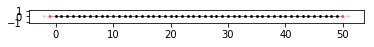

In [113]:
syst = make_system()
# Check that the system looks as intended.
kwant.plot(syst)
# Finalize the system.
syst = syst.finalized()


Total number of states: 4575.6135967855


Text(0.5,0,'Density of states [Arbitrary units]')

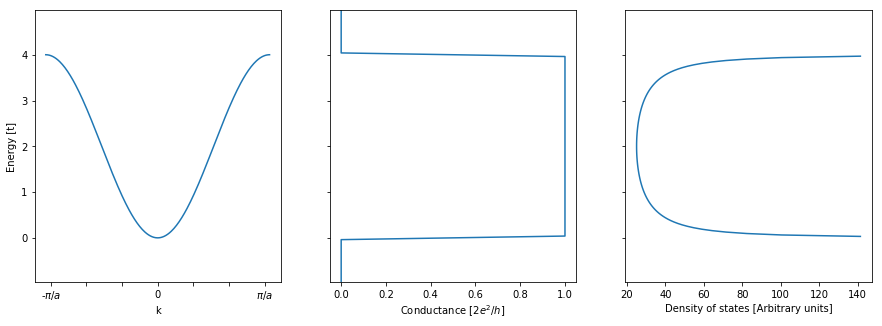

In [114]:
def conductance(syst, energies):
    data = []
    for energy in energies:
        smatrix = kwant.smatrix(syst, energy)
        data.append(smatrix.transmission(0, 1))
    return data
    

density = kwant.operator.Density(syst)

energies, doss = [], []
for e in np.linspace(0.0, 4.0, 128):
    try:
        wf = kwant.wave_function(syst, energy=e)(0)
        dos = density(wf[0])
        energies.append(e)
        doss.append(np.sum(dos))
#         pyplot.plot(np.absolute(wf))
#         pyplot.show()
    except:
        pass

e = np.linspace(-10,10,256)
cond = conductance(syst, energies=e)
fig, axes = pyplot.subplots(1,3, figsize=(15,5), sharey='row')

kwant.plotter.bands(syst.leads[0], momenta=np.linspace(-np.pi,  np.pi, 256), show=False, ax=axes[0])
axes[1].plot(cond, e)
axes[2].plot(doss, energies)


print('Total number of states:', np.sum(doss))

axes[0].set_ylim((np.min(energies) -1, np.max(energies) + 1))
axes[1].set_ylim((np.min(energies) -1, np.max(energies) + 1))
axes[2].set_ylim((np.min(energies) -1, np.max(energies) + 1))
axes[0].set_xlabel('k')
axes[0].set_ylabel('Energy [t]')
pyplot.sca(axes[0])
pyplot.xticks(range(-3,4), ['-$\pi / a$', '', '', 0, '', '', '$\pi / a$'])

axes[1].set_xlabel('Conductance [$2e^2 / h$]')
axes[2].set_xlabel('Density of states [Arbitrary units]')

In [115]:
kB = 1.0
T = 0.001
def fermi(E, mu):
    return 1. / (np.exp((E - mu) / (kB * T)) + 1.)

vec_fermi = np.vectorize(fermi)

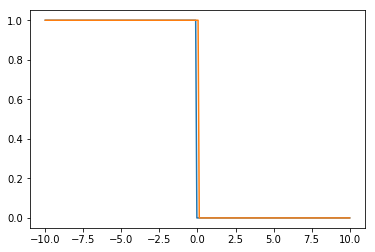

In [116]:
pyplot.plot(e, vec_fermi(e, -0.1), e, vec_fermi(e, 0.1))

The current is: 1.273240 e / h.


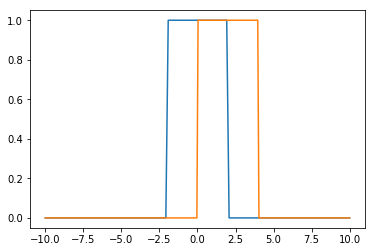

In [117]:
diff = vec_fermi(e, 2.0) - vec_fermi(e, -2.0)
pyplot.plot(e, diff, e, cond)
current = 2 * (e[1] - e[0]) * np.sum(cond * diff) / np.pi
print('The current is: %f e / h.' % current)

Text(0,0.5,'Current [2e / h]')

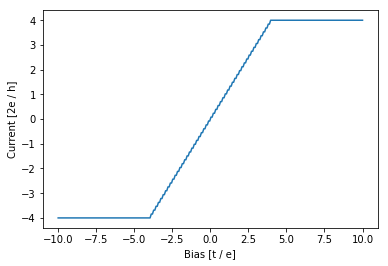

In [120]:
bias = np.linspace(-10.0, 10.0, 256)
V, I = [], []
for i, val in enumerate(bias):
    mu_left = 2.0 + val / 2.
    mu_right = -val / 2.0 + 2.0
    diff = vec_fermi(e, mu_left) - vec_fermi(e, mu_right)
    current = (e[1] - e[0]) * np.sum(cond * diff) 
    I.append(current)
    V.append(mu_left - mu_right)
pyplot.plot(V, I)
pyplot.xlabel('Bias [t / e]')
pyplot.ylabel('Current [2e / h]')